In [73]:
# If you run on colab uncomment the following line
#!pip install git+https://github.com/clementchadebec/benchmark_VAE.git

In [74]:
import torch
import torchvision.datasets as datasets

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
mnist_trainset = datasets.MNIST(root='../../data', train=True, download=True, transform=None)

train_dataset = mnist_trainset.data[:-10000].reshape(-1, 1, 28, 28) / 255.
eval_dataset = mnist_trainset.data[-10000:].reshape(-1, 1, 28, 28) / 255.

In [76]:
from pythae.models import Adversarial_AE, Adversarial_AE_Config
from pythae.trainers import AdversarialTrainer, AdversarialTrainerConfig
from pythae.pipelines.training import TrainingPipeline
from pythae.models.nn.benchmarks.mnist import Encoder_VAE_MNIST, Decoder_AE_MNIST

In [77]:
config = AdversarialTrainerConfig(
    output_dir='my_model',
    learning_rate=1e-4,
    batch_size=100,
    num_epochs=100,
)


model_config = Adversarial_AE_Config(
    input_dim=(1, 28, 28),
    latent_dim=10,
    adversarial_loss_scale=0.5
)

model = Adversarial_AE(
    model_config=model_config,
    encoder=Encoder_VAE_MNIST(model_config), 
    decoder=Decoder_AE_MNIST(model_config) 
)

In [78]:
pipeline = TrainingPipeline(
    training_config=config,
    model=model
)

In [79]:
pipeline(
    train_data=train_dataset,
    eval_data=eval_dataset
)

Preprocessing train data...
Preprocessing eval data...
Model passed sanity check !

Created my_model/Adversarial_AE_training_2021-12-16_10-49-47. 
Training config, checkpoints and final model will be saved here.

Successfully launched training !

Eval of epoch 1/10: 100%|██████████| 50/50 [00:05<00:00,  9.33batch/s]
----------------------------------------------------------------
Epoch 1: Train loss: 55.624353714	 Generator loss: 54.584876709	 Discriminator loss: 1.0394767976
Epoch 1: Eval loss: 40.5481219482	 Generator loss: 39.6010273361	 Discriminator loss: 0.9470945561
----------------------------------------------------------------
Eval of epoch 2/10: 100%|██████████| 50/50 [00:05<00:00,  9.47batch/s]
----------------------------------------------------------------
Epoch 2: Train loss: 43.3557337952	 Generator loss: 42.1889411926	 Discriminator loss: 1.1667925298
Epoch 2: Eval loss: 41.2521141052	 Generator loss: 40.5294526672	 Discriminator loss: 0.7226614845
--------------------

In [40]:
import os

In [41]:
last_training = sorted(os.listdir('my_model'))[-1]
trained_model = Adversarial_AE.load_from_folder(os.path.join('my_model', last_training, 'final_model'))

In [42]:
from pythae.samplers import NormalSampler

In [43]:
# create normal sampler
normal_samper = NormalSampler(
    model=trained_model
)

In [44]:
# sample
gen_data = normal_samper.sample(
    num_samples=25
)

In [45]:
import matplotlib.pyplot as plt

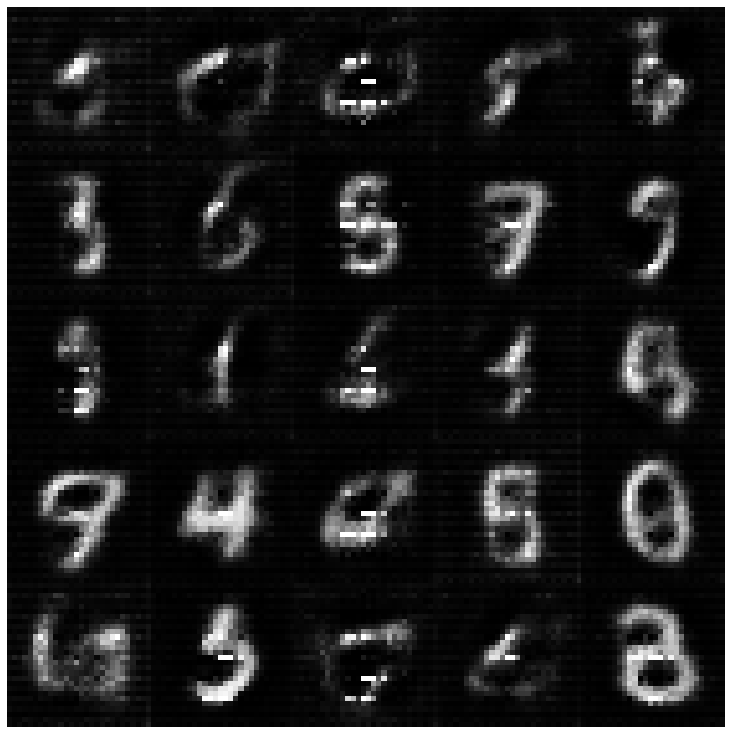

In [46]:
# show results with normal sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [47]:
from pythae.samplers import GaussianMixtureSampler, GaussianMixtureSamplerConfig

In [48]:
# set up gmm sampler config
gmm_sampler_config = GaussianMixtureSamplerConfig(
    n_components=10
)

# create gmm sampler
gmm_sampler = GaussianMixtureSampler(
    sampler_config=gmm_sampler_config,
    model=trained_model
)

# fit the sampler
gmm_sampler.fit(train_dataset)

In [49]:
# sample
gen_data = gmm_sampler.sample(
    num_samples=25
)

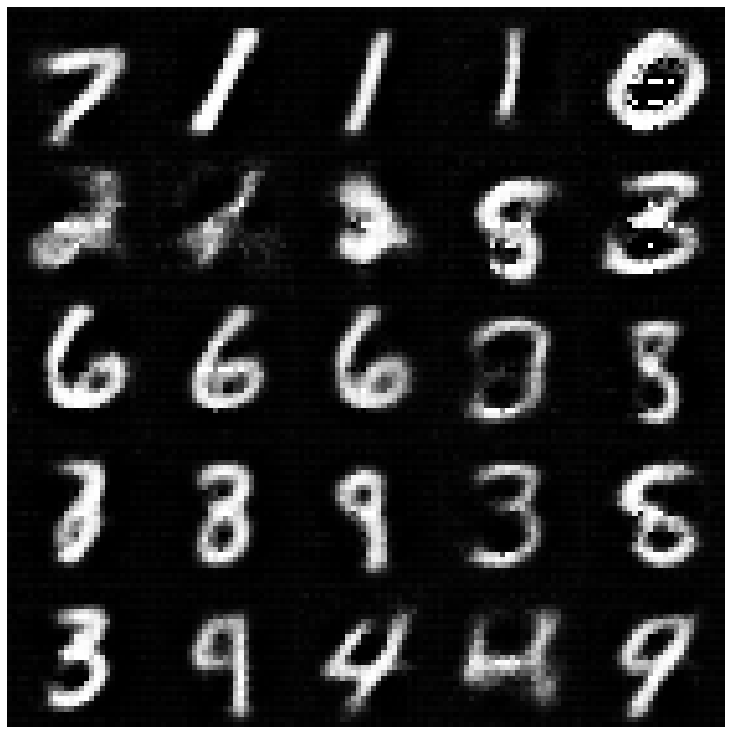

In [50]:
# show results with gmm sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

## ... the other samplers work the same